In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from autoencoderhandler import *

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
%load_ext autoreload
%autoreload 2

Using device: cuda


(-0.5, 255.5, 255.5, -0.5)

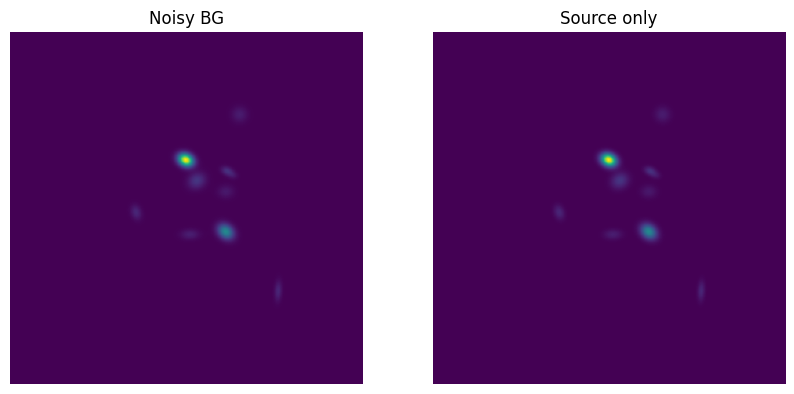

In [24]:

image, image_forground = create_image()

# Display the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.cpu().numpy())
plt.title('Noisy BG')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_forground.cpu().numpy())
plt.title('Source only')
plt.axis('off')


In [25]:

# Dataset and DataLoader setup
num_train_images = 2048  # Specify how many images you want for training
train_dataset = DynamicImageDataset(num_train_images)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)

In [5]:

# Model, loss, and optimizer
model = Autoencoder2().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-3)

# Train the model
train(model, train_loader, epochs=100, device=device, criterion=criterion, optimizer=optimizer)

torch.save(model.state_dict(), 'model.pth')

Epoch 1, Loss: 0.12578500481322408
Epoch 2, Loss: 0.06145161285530776
Epoch 3, Loss: 0.03323518484830856
Epoch 4, Loss: 0.0203702769940719
Epoch 5, Loss: 0.014053819788387045
Epoch 6, Loss: 0.010529466875595972
Epoch 7, Loss: 0.008494468056596816
Epoch 8, Loss: 0.0068684065190609545
Epoch 9, Loss: 0.0056487974361516535
Epoch 10, Loss: 0.004754253677674569
Epoch 11, Loss: 0.004149489977862686
Epoch 12, Loss: 0.0037416886334540322
Epoch 13, Loss: 0.003442194574745372
Epoch 14, Loss: 0.0031928274474921636
Epoch 15, Loss: 0.0030076111215748824
Epoch 16, Loss: 0.0028878095690743066
Epoch 17, Loss: 0.002770340273855254
Epoch 18, Loss: 0.0026386390018160455
Epoch 19, Loss: 0.0025565940668457188
Epoch 20, Loss: 0.0024334326953976415
Epoch 21, Loss: 0.0024133418119163252
Epoch 22, Loss: 0.0023426573097822256
Epoch 23, Loss: 0.002311524483957328
Epoch 24, Loss: 0.0022514095217047725
Epoch 25, Loss: 0.002200958493631333
Epoch 26, Loss: 0.0021845589217264205
Epoch 27, Loss: 0.0021368874513427727
E

In [6]:
# save the model
image_test = torch.Tensor(image_forground).to(device)
image_test = image_test.unsqueeze(0)


(model.encoder(image_test[None,:,:])).shape

torch.Size([1, 512])

In [7]:
image_test.shape

torch.Size([1, 256, 256])

(-0.5, 255.5, 255.5, -0.5)

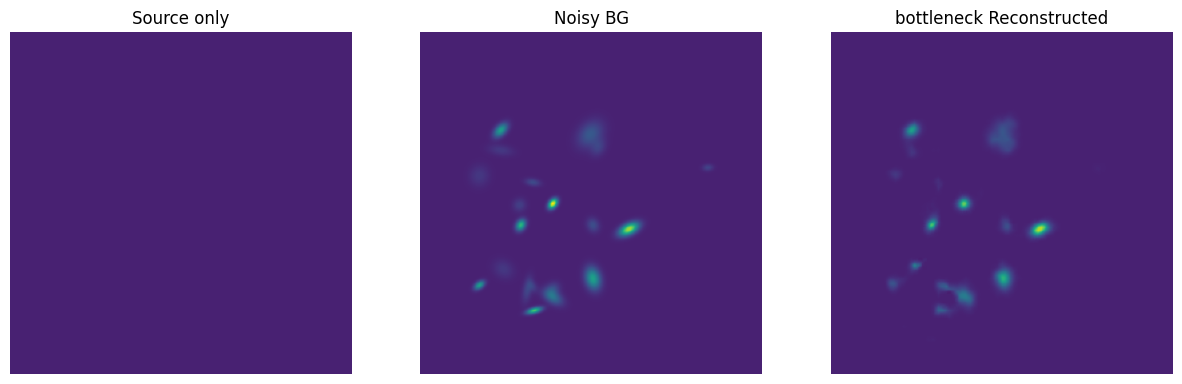

In [49]:
model.eval()


image_test, image_forground_test = train_dataset.__getitem__(0)

with torch.no_grad():
    image_test = image_test.to(device)
    output = model(image_test.unsqueeze(0))
    output = output.squeeze().cpu().numpy()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.imshow(image_test.squeeze(0).cpu().numpy(),vmax=1,vmin=-0.1)
plt.title('Noisy BG')
plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(image_forground_test.squeeze(0).cpu().numpy(),vmax=1,vmin=-0.1)
plt.title('Source only')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output,vmax=1,vmin=-0.1)
plt.title('bottleneck Reconstructed')
plt.axis('off')

In [4]:
from astropy.io import fits

fname_dirty = 'sun_only-t0008-dirty.fits'
hdul = fits.open(fname_dirty)
data_dirty = hdul[0].data.squeeze()
header = hdul[0].header

data_for_train = torch.Tensor(data_dirty[None,None,:,:]/np.max(data_dirty)).to(device)

In [71]:
data_for_train

tensor([[[[ 0.0402,  0.0563,  0.0670,  ..., -0.0051, -0.0170, -0.0350],
          [ 0.0380,  0.0446,  0.0483,  ..., -0.0032, -0.0112, -0.0245],
          [ 0.0265,  0.0223,  0.0176,  ...,  0.0060,  0.0013, -0.0086],
          ...,
          [-0.0538, -0.0535, -0.0521,  ..., -0.0004,  0.0010,  0.0088],
          [-0.0613, -0.0621, -0.0583,  ..., -0.0203, -0.0209, -0.0142],
          [-0.0595, -0.0583, -0.0498,  ..., -0.0276, -0.0310, -0.0323]]]],
       device='cuda:0')

In [72]:

model = Autoencoder3().to(device)
model.load_state_dict(torch.load('model200round128model3.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train))
    output = output.squeeze().cpu().numpy()

In [73]:

model = Autoencoder3().to(device)
model.load_state_dict(torch.load('model400round128model3.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train))
    output = output.squeeze().cpu().numpy()

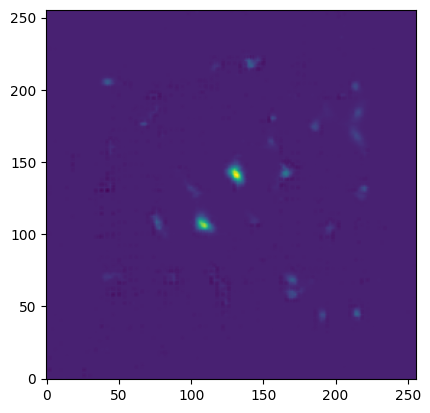

In [7]:

model = Autoencoder2().to(device)
model.load_state_dict(torch.load('./modelfile/model2_epoch4500.pth'))

#model.load_state_dict(torch.load('./modelepoch500bn256model2.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train))
    output = output.squeeze().cpu().numpy()
plt.imshow(output, origin='lower', vmax=1, vmin=-0.1)

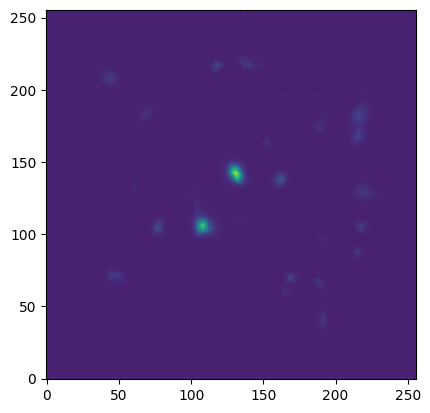

In [75]:

model = Autoencoder2().to(device)
model.load_state_dict(torch.load('./modelfile/model2_epoch300.pth'))

#model.load_state_dict(torch.load('./modelepoch500bn256model2.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train))
    output = output.squeeze().cpu().numpy()
plt.imshow(output, origin='lower', vmax=1, vmin=-0.1)

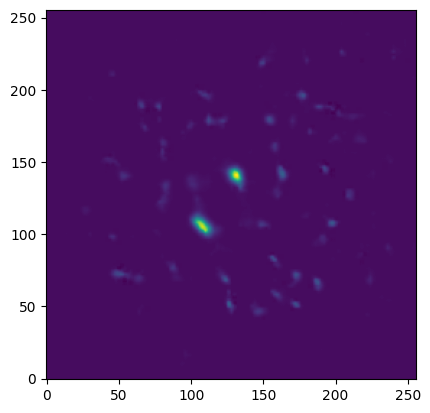

In [6]:
np.max(output)

1.0400437

In [62]:

data_for_train = torch.Tensor(data_dirty[None,None,:,:]/np.max(data_dirty)).to(device)

model = Autoencoder2().to(device)
model.load_state_dict(torch.load('/data07/peijinz/FastMediumWell/modelepoch500bn256model2.pth'))
model.load_state_dict(torch.load('./modelfile/model2_epoch4500.pth'))
model.eval()

for idx in range(100):
    fname_dirty = 'sun_only-t'+ str(idx).rjust(4,'0') +'-dirty.fits'
    hdul = fits.open(fname_dirty)
    data_dirty = hdul[0].data.squeeze()
    header = hdul[0].header
    data_for_train = torch.Tensor(data_dirty[None,None,:,:]/np.max(data_dirty)).to(device)

    with torch.no_grad():
        output = model(data_for_train)
        output = output.squeeze().cpu().numpy()

    fig = plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(data_dirty, origin='lower')
    ax1.set_title('wsclean')
    
    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(output, origin='lower')
    ax2.set_title('Autoencoder')

    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(data_dirty, origin='lower')
    ax3.contour(output, levels=[0.5], colors='r')
    plt.setp(ax3, xlim=(64, 192), ylim=(64, 192))
    ax3.set_title('wsclean(map) Autoencoder(contour)')
    
    plt.gcf().savefig('fig/autoencoder'+str(idx).rjust(4,'0')+'.png')
    plt.close(fig)

